In [1]:
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 75

In [2]:
df = pd.read_excel('Merged.xlsx')

In [3]:
label_encoder = LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])
df['label'].unique()

array([2, 1, 3, 0])

In [4]:
# Splitting the dataset into test/train datasets
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size = 0.20, shuffle=True, random_state=42)

In [5]:
def classify(X_train, X_test, y_train, y_test):
    tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_train = tfidf.fit_transform(X_train)

    tfidf_test = tfidf.transform(X_test)

    

    lr =  LogisticRegression(solver= 'liblinear', penalty='l1', C = 100, max_iter = 300)
    lr.fit(tfidf_train, y_train)

    y_pred = lr.predict(tfidf_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    cm_disp.plot(xticks_rotation = 'vertical')
    plt.show()

/home/sudheesh/anaconda3/envs/rubrix/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.12      0.18        68
           1       0.70      0.69      0.70       275
           2       0.88      0.92      0.90      1396
           3       0.58      0.54      0.56       141

    accuracy                           0.83      1880
   macro avg       0.63      0.57      0.58      1880
weighted avg       0.81      0.83      0.82      1880



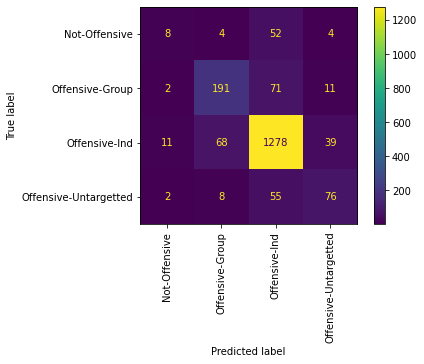

In [6]:
classify(X_train, X_test, y_train, y_test)

In [7]:
from xgboost import XGBClassifier

In [8]:
def xgclassify(X_train, X_test, y_train, y_test):
    tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_train = tfidf.fit_transform(X_train)

    tfidf_test = tfidf.transform(X_test)

    
 #xg =  XGBClassifier(eta=0.2, min_child_weight=50, subsample =0.8, alpha=500)
    xg =  XGBClassifier(max_depth= 10, subsample =0.75, alpha =10, eta =0.2)
    xg.fit(tfidf_train, y_train)

    y_pred = xg.predict(tfidf_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    cm_disp.plot(xticks_rotation = 'vertical')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        68
           1       0.76      0.66      0.71       275
           2       0.86      0.96      0.91      1396
           3       0.78      0.45      0.57       141

    accuracy                           0.84      1880
   macro avg       0.85      0.53      0.56      1880
weighted avg       0.84      0.84      0.82      1880



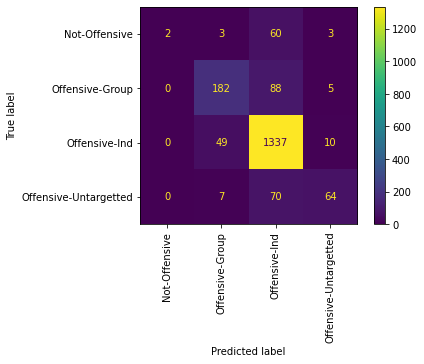

In [9]:
xgclassify(X_train, X_test, y_train, y_test)